# House price prediction

##Importing Libraries

In [379]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sb
import os
sb.set()

## Mounting Google Drive

In [380]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Loading the data set 

In [381]:
data=pd.read_csv("/content/drive/MyDrive/Machine learning/Bengaluru_House_Data.csv")


In [382]:
data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [383]:
data.shape


(13320, 9)

In [384]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [385]:
data.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

## Checking Unique values

In [386]:
for columns in data.columns:
  print(columns)
  print("-"*50)
  print(data[columns].value_counts())
  print("-"*50)

area_type
--------------------------------------------------
Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64
--------------------------------------------------
availability
--------------------------------------------------
Ready To Move    10581
18-Dec             307
18-May             295
18-Apr             271
18-Aug             200
                 ...  
15-Aug               1
17-Jan               1
16-Nov               1
16-Jan               1
14-Jul               1
Name: availability, Length: 81, dtype: int64
--------------------------------------------------
location
--------------------------------------------------
Whitefield                        540
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
Bapuji Layout                       1
1st

## Dropping a selected column

In [387]:
data.drop(columns=["society"],inplace=True)


In [388]:
data=data.dropna(how="any",axis=0)

In [389]:
data.shape

(12710, 8)

In [390]:
data.describe()


,bath,balcony,price
count,12710.000000,12710.000000,12710.000000
mean,2.617309,1.584343,106.060778
std,1.226000,0.817287,131.766089
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,49.030000
50%,2.000000,2.000000,70.000000
75%,3.000000,2.000000,115.000000
max,40.000000,3.000000,2912.000000


In [391]:
data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 12710 entries, 0 to 13319
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     12710 non-null  object 
 1   availability  12710 non-null  object 
 2   location      12710 non-null  object 
 3   size          12710 non-null  object 
 4   total_sqft    12710 non-null  object 
 5   bath          12710 non-null  float64
 6   balcony       12710 non-null  float64
 7   price         12710 non-null  float64
dtypes: float64(3), object(5)
memory usage: 893.7+ KB


## Slicing size column for integer values due to inconsistent suffixes

In [392]:
data["bhk"]=data["size"].str.split().str.get(0).astype(int)

<ipython-input-392-37ba1c794570>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["bhk"]=data["size"].str.split().str.get(0).astype(int)


In [393]:
#cheking for outliers
data[data.bhk > 20]

,area_type,availability,location,size,total_sqft,bath,balcony,price,bhk
1718,Super built-up Area,Ready To Move,2Electronic City Phase II,27 BHK,8000,27.0,0.0,230.0,27
4684,Plot Area,Ready To Move,Munnekollal,43 Bedroom,2400,40.0,0.0,660.0,43


In [394]:
#checking for range for this column
data["total_sqft"].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [395]:
#creating a function to deal with the ranges given in some cells in "total_sqft" column
def Covt_Range(x):
  temp=x.split('_')
  if len(temp) == 2:
    return (float(temp[0]) + float(temp[1]))/2
  try:
    return float(x)
  except:
    return None

In [396]:
#Applying "covt_range" to "total_sqft" column
data["total_sqft"]=data["total_sqft"].apply(Covt_Range)
data["total_sqft"].unique()

array([1056., 2600., 1440., ..., 2758.,  774., 4689.])

In [397]:
data["area_type"].unique()


array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [398]:
data.drop(columns=["area_type",'availability'],inplace=True)

In [399]:
data.head()

,location,size,total_sqft,bath,balcony,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2


<ipython-input-400-f7f982170bd5>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation=data.corr()


<Axes: >

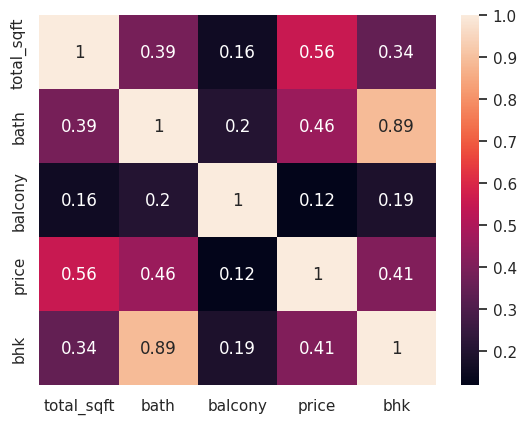

In [400]:
correlation=data.corr()
sb.heatmap(correlation,xticklabels=correlation.columns,yticklabels=correlation.columns,annot=True)

In [401]:
data["bath"].unique()

array([ 2.,  5.,  3.,  4.,  1.,  8.,  7.,  6.,  9., 27., 11., 12., 10.,
       40., 15., 13.])

In [402]:
data["balcony"].unique()

array([1., 3., 2., 0.])

In [403]:
data['bhk'].unique()

array([ 2,  4,  3,  1,  6,  8,  7,  5, 11,  9, 27, 43, 14, 12, 10, 13])

In [404]:
data.drop(columns=["bath"],inplace=True)

In [405]:
data.head()

,location,size,total_sqft,balcony,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,1.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,3.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,3.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,1.0,95.00,3
4,Kothanur,2 BHK,1200.0,1.0,51.00,2


In [406]:
data["price_per_sqft"]=data["price"]*10000/data["total_sqft"]

In [407]:
data["price_per_sqft"]=data["price_per_sqft"].round(2)
data["price_per_sqft"]

0         369.98
1         461.54
2         430.56
3         624.59
4         425.00
          ...   
13314     653.06
13315     668.98
13317     525.85
13318    1040.73
13319     309.09
Name: price_per_sqft, Length: 12710, dtype: float64

In [408]:
data.describe()

,total_sqft,balcony,price,bhk,price_per_sqft
count,12524.000000,12710.000000,12710.000000,12710.000000,12524.000000
mean,1510.454911,1.584343,106.060778,2.737136,689.745458
std,1162.445581,0.817287,131.766089,1.205097,2276.190401
min,5.000000,0.000000,8.000000,1.000000,26.780000
25%,1100.000000,1.000000,49.030000,2.000000,424.012500
50%,1260.000000,2.000000,70.000000,3.000000,539.220000
75%,1640.000000,2.000000,115.000000,3.000000,717.130000
max,52272.000000,3.000000,2912.000000,43.000000,230000.000000


In [409]:
data["location"]=data["location"].apply(lambda x:x.strip())
location_count=data["location"].value_counts()
location_count

Whitefield          515
Sarjapur  Road      372
Electronic City     302
Kanakpura Road      261
Thanisandra         234
                   ... 
Shirdi Sai Nagar      1
S R Layout            1
Meenakshi Layout      1
Vidyapeeta            1
Abshot Layout         1
Name: location, Length: 1254, dtype: int64

In [410]:
location_count_less_10=location_count[location_count<=10]
location_count_less_10

Kalkere                  10
Kodigehalli              10
Ganga Nagar              10
1st Block Koramangala    10
Gunjur Palya             10
                         ..
Shirdi Sai Nagar          1
S R Layout                1
Meenakshi Layout          1
Vidyapeeta                1
Abshot Layout             1
Name: location, Length: 1017, dtype: int64

In [411]:
data["location"]=data["location"].apply(lambda x: 'other' if x in location_count_less_10 else x)

In [412]:
data["location"].value_counts()

other                        2739
Whitefield                    515
Sarjapur  Road                372
Electronic City               302
Kanakpura Road                261
                             ... 
Marsur                         11
LB Shastri Nagar               11
2nd Phase Judicial Layout      11
ISRO Layout                    11
Vishveshwarya Layout           11
Name: location, Length: 238, dtype: int64

In [413]:
#Remowing outliers

In [414]:
data.describe()

,total_sqft,balcony,price,bhk,price_per_sqft
count,12524.000000,12710.000000,12710.000000,12710.000000,12524.000000
mean,1510.454911,1.584343,106.060778,2.737136,689.745458
std,1162.445581,0.817287,131.766089,1.205097,2276.190401
min,5.000000,0.000000,8.000000,1.000000,26.780000
25%,1100.000000,1.000000,49.030000,2.000000,424.012500
50%,1260.000000,2.000000,70.000000,3.000000,539.220000
75%,1640.000000,2.000000,115.000000,3.000000,717.130000
max,52272.000000,3.000000,2912.000000,43.000000,230000.000000


In [415]:
#remowing outliers from "total_sqft" column
(data["total_sqft"]/data["bhk"]).describe()

count    12524.000000
mean       569.033597
std        381.881959
min          0.714286
25%        472.916667
50%        550.000000
75%        621.270833
max      26136.000000
dtype: float64

In [416]:
data=data[(data["total_sqft"]/data["bhk"]>=300)]
data.describe()

,total_sqft,balcony,price,bhk,price_per_sqft
count,11869.000000,11869.000000,11869.000000,11869.000000,11869.000000
mean,1541.229363,1.606875,105.170490,2.609824,622.029724
std,1181.717548,0.794513,134.650984,0.919589,400.434318
min,300.000000,0.000000,9.000000,1.000000,26.780000
25%,1109.000000,1.000000,48.700000,2.000000,419.850000
50%,1285.000000,2.000000,68.270000,2.000000,526.320000
75%,1656.000000,2.000000,110.000000,3.000000,684.470000
max,52272.000000,3.000000,2912.000000,13.000000,17647.060000


In [417]:
data.shape

(11869, 7)

In [418]:
data.price_per_sqft.describe()

count    11869.000000
mean       622.029724
std        400.434318
min         26.780000
25%        419.850000
50%        526.320000
75%        684.470000
max      17647.060000
Name: price_per_sqft, dtype: float64

In [419]:
#removing the outlier from "price_per_sqft" column
q=data["price_per_sqft"].quantile(0.99)
data_1=data[data["price_per_sqft"]<q]
data_1.describe()

,total_sqft,balcony,price,bhk,price_per_sqft
count,11749.000000,11749.000000,11749.000000,11749.000000,11749.000000
mean,1527.941078,1.606349,98.363056,2.595966,598.998165
std,1162.632575,0.793249,102.483076,0.903830,288.291131
min,300.000000,0.000000,9.000000,1.000000,26.780000
25%,1107.000000,1.000000,48.330000,2.000000,418.700000
50%,1280.000000,2.000000,68.000000,2.000000,524.020000
75%,1650.000000,2.000000,110.000000,3.000000,677.080000
max,52272.000000,3.000000,2200.000000,13.000000,2074.070000


In [420]:
data.bhk.describe()

count    11869.000000
mean         2.609824
std          0.919589
min          1.000000
25%          2.000000
50%          2.000000
75%          3.000000
max         13.000000
Name: bhk, dtype: float64

In [421]:
#removing outliers or invalid data points from "bhk" column
def bhk_outliers(df):
  exclude_indices =np.array([]) #creating an empty array which will carry all the values we need
  for location,location_df in df.groupby ('location'):
    bhk_stats={}
    for bhk,bhk_df in location_df.groupby('bhk'):
      bhk_stats[bhk]={
          'mean':np.mean(bhk_df.price_per_sqft),
          'std':np.std(bhk_df.price_per_sqft),
          'count':bhk_df.shape[0] #number of unique values
      }
  for bhk,bhk_df in location_df.groupby('bhk'):
    stats =bhk_stats.get(bhk-1)
    if stats and stats['count']>5:  #checking for threshold no.of data points to get accurate mean
       exclude_indices = np.append(exclude_indices,bhk_df[bhk_df.price_per_sqft < (stats['mean'])].index.values)
  return df.drop(exclude_indices,axis='index')

In [422]:
data=bhk_outliers(data)
data.shape

(10397, 7)

In [423]:
data.head()

,location,size,total_sqft,balcony,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,1.0,39.07,2,369.98
1,Chikka Tirupathi,4 Bedroom,2600.0,3.0,120.00,4,461.54
2,Uttarahalli,3 BHK,1440.0,3.0,62.00,3,430.56
3,Lingadheeranahalli,3 BHK,1521.0,1.0,95.00,3,624.59
4,Kothanur,2 BHK,1200.0,1.0,51.00,2,425.00


In [424]:
data.shape

(10397, 7)

In [425]:
data.drop(columns=['size', 'price_per_sqft'], inplace = True)

In [426]:
data.head()

,location,total_sqft,balcony,price,bhk
0,Electronic City Phase II,1056.0,1.0,39.07,2
1,Chikka Tirupathi,2600.0,3.0,120.00,4
2,Uttarahalli,1440.0,3.0,62.00,3
3,Lingadheeranahalli,1521.0,1.0,95.00,3
4,Kothanur,1200.0,1.0,51.00,2


In [427]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10397 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    10397 non-null  object 
 1   total_sqft  10397 non-null  float64
 2   balcony     10397 non-null  float64
 3   price       10397 non-null  float64
 4   bhk         10397 non-null  int64  
dtypes: float64(3), int64(1), object(1)
memory usage: 487.4+ KB


In [429]:
data.to_csv("Cleaned_data.csv")

In [430]:
x = data.drop(columns = ['price'] ) # Independent Features
y = data['price'] # Feature which we are predicting through the model

In [431]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

In [432]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 0)

In [433]:
print(x_train.shape)
print(x_test.shape)

(8317, 4)
(2080, 4)


## Linear Regression

In [434]:
column_trans = make_column_transformer((OneHotEncoder(sparse=False), ['location']), remainder = 'passthrough')


In [435]:
scaler = StandardScaler()

In [436]:
lr = LinearRegression()

In [437]:
pipe = make_pipeline(column_trans, scaler, lr)

In [438]:
pipe.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  ['location'])])),
                ('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [439]:
model = make_pipeline(StandardScaler(with_mean = False), LinearRegression())

In [442]:
y_pred_lr = pipe.predict(x_test)


In [443]:
r2_score(y_test, y_pred_lr)

0.48445085412248157

 # Lasso

In [444]:
lasso = Lasso()

In [445]:
pipe = make_pipeline(column_trans, scaler, lasso)

In [446]:
pipe.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  ['location'])])),
                ('standardscaler', StandardScaler()), ('lasso', Lasso())])

In [447]:
y_pred_lasso = pipe.predict(x_test)
r2_score(y_test, y_pred_lasso)

0.4823921692643245

# Ridge

In [448]:
ridge = Ridge()

In [449]:
pipe = make_pipeline(column_trans, scaler, ridge)

In [450]:
pipe.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  ['location'])])),
                ('standardscaler', StandardScaler()), ('ridge', Ridge())])

In [451]:
y_pred_ridge = pipe.predict(x_test)
r2_score(y_test, y_pred_ridge)

0.4843041091164243